In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from safetensors.torch import load_file
from tqdm import tqdm
import pandas as pd


In [43]:
features = pd.read_csv("sslfeatures_score.csv")
df = features

In [58]:
df[27600:110000]

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,model_name,accuracy,fluency,prosodic,total
27600,-0.011908,-0.063417,0.008047,-0.054820,-0.093042,-0.329241,0.149642,0.071038,-0.075174,-0.177379,...,-0.106745,-0.032996,0.092212,0.007166,-0.240499,gen_wlm-base-plus-sv,8.0,8.0,8.0,8.0
27601,-0.005294,-0.069334,0.001203,-0.036161,-0.098436,-0.277359,0.157469,0.038195,-0.086763,-0.158759,...,-0.115268,-0.028321,0.096712,-0.022226,-0.223478,gen_wlm-base-plus-sv,8.0,7.0,7.0,7.0
27602,-0.010713,-0.066778,0.006710,-0.048015,-0.092439,-0.320647,0.152529,0.066477,-0.077367,-0.175255,...,-0.106513,-0.029870,0.095239,0.000861,-0.235176,gen_wlm-base-plus-sv,7.0,8.0,7.0,7.0
27603,-0.012171,-0.061566,0.008849,-0.055966,-0.092001,-0.342440,0.144156,0.077429,-0.070640,-0.184600,...,-0.106482,-0.032306,0.093443,0.014413,-0.242353,gen_wlm-base-plus-sv,9.0,9.0,9.0,9.0
27604,-0.008164,-0.067959,0.011031,-0.051151,-0.090565,-0.317850,0.149006,0.065583,-0.078369,-0.170663,...,-0.106112,-0.033257,0.090411,0.003608,-0.233962,gen_wlm-base-plus-sv,8.0,8.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,0.005956,0.011442,-0.037425,-0.091800,-0.022152,0.024215,-0.033921,-0.050104,-0.043904,-0.006250,...,0.103243,0.016767,-0.090980,-0.022442,-0.036518,ptctc_wlm,5.0,3.0,3.0,4.0
104996,-0.021480,0.047278,-0.071888,0.022776,0.001719,-0.008967,-0.035891,-0.001905,-0.073057,-0.030910,...,0.081871,-0.008224,-0.054527,-0.007168,-0.046957,ptctc_wlm,6.0,6.0,5.0,5.0
104997,-0.019851,0.004047,-0.050236,-0.001338,-0.010708,0.026346,0.022531,-0.055590,-0.035730,-0.016391,...,0.104731,-0.019901,-0.075207,-0.027392,-0.081663,ptctc_wlm,4.0,3.0,3.0,3.0
104998,0.021291,-0.019406,-0.041489,-0.033971,-0.005212,-0.014104,-0.004423,0.017132,-0.068966,-0.055877,...,0.138642,0.021645,-0.058887,0.023620,-0.023694,ptctc_wlm,5.0,5.0,4.0,4.0


In [59]:
gen_w2v2_large_df = df[df['model_name'] == 'gen_wlm-large']
df = gen_w2v2_large_df
df

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,model_name,accuracy,fluency,prosodic,total
22500,0.047748,0.068662,-0.064294,0.174725,0.203255,-0.256530,-0.337839,0.186305,-0.617891,-0.358959,...,0.270308,-0.311261,0.235004,0.167097,0.337768,gen_wlm-large,9.0,9.0,9.0,9.0
22501,0.073716,0.071957,-0.075457,0.184846,0.189336,-0.262409,-0.330915,0.204741,-0.612548,-0.358052,...,0.283633,-0.328375,0.255393,0.167201,0.355464,gen_wlm-large,7.0,9.0,9.0,7.0
22502,0.081790,0.077799,-0.085627,0.184091,0.185726,-0.265604,-0.325720,0.214177,-0.604795,-0.354009,...,0.287836,-0.330250,0.264393,0.171357,0.358867,gen_wlm-large,9.0,9.0,9.0,9.0
22503,0.082758,0.074907,-0.083520,0.186580,0.187089,-0.264341,-0.324565,0.218219,-0.602368,-0.355493,...,0.287649,-0.333369,0.266246,0.171601,0.359166,gen_wlm-large,8.0,9.0,8.0,7.0
22504,0.088482,0.078601,-0.086645,0.184168,0.187632,-0.264526,-0.324799,0.222358,-0.600271,-0.351078,...,0.287101,-0.332102,0.267764,0.170855,0.360944,gen_wlm-large,9.0,9.0,9.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.260472,-0.066542,-0.007691,0.089134,0.200508,-0.395913,-0.423067,0.237809,-0.488213,-0.011143,...,0.015772,-0.195240,0.111165,0.159704,0.405299,gen_wlm-large,5.0,3.0,3.0,4.0
24996,-0.237303,-0.018322,-0.034352,0.005481,0.170031,-0.375384,-0.331772,0.229613,-0.473984,-0.066978,...,0.050762,-0.235930,0.079996,0.199349,0.306182,gen_wlm-large,6.0,6.0,5.0,5.0
24997,-0.232686,0.015760,-0.037273,-0.004086,0.183067,-0.302340,-0.270686,0.225534,-0.417821,-0.107592,...,0.069144,-0.204255,0.079306,0.188419,0.228815,gen_wlm-large,4.0,3.0,3.0,3.0
24998,-0.253317,-0.052907,-0.014158,0.076767,0.193068,-0.375306,-0.421027,0.246819,-0.488377,-0.008284,...,0.013795,-0.215147,0.097576,0.161342,0.387673,gen_wlm-large,5.0,5.0,4.0,4.0


## Split feature vectors and labels

In [60]:
# X is feature vectors

X = df.drop(['model_name', 'accuracy', 'fluency', 'prosodic', 'total'], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
22500,0.047748,0.068662,-0.064294,0.174725,0.203255,-0.256530,-0.337839,0.186305,-0.617891,-0.358959,...,0.095084,0.234697,-0.089862,0.114346,0.404484,0.270308,-0.311261,0.235004,0.167097,0.337768
22501,0.073716,0.071957,-0.075457,0.184846,0.189336,-0.262409,-0.330915,0.204741,-0.612548,-0.358052,...,0.116445,0.278376,-0.109848,0.119071,0.399321,0.283633,-0.328375,0.255393,0.167201,0.355464
22502,0.081790,0.077799,-0.085627,0.184091,0.185726,-0.265604,-0.325720,0.214177,-0.604795,-0.354009,...,0.133041,0.308772,-0.129899,0.124733,0.392435,0.287836,-0.330250,0.264393,0.171357,0.358867
22503,0.082758,0.074907,-0.083520,0.186580,0.187089,-0.264341,-0.324565,0.218219,-0.602368,-0.355493,...,0.132997,0.308516,-0.127845,0.122396,0.392452,0.287649,-0.333369,0.266246,0.171601,0.359166
22504,0.088482,0.078601,-0.086645,0.184168,0.187632,-0.264526,-0.324799,0.222358,-0.600271,-0.351078,...,0.136029,0.318990,-0.130915,0.124711,0.389525,0.287101,-0.332102,0.267764,0.170855,0.360944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,-0.260472,-0.066542,-0.007691,0.089134,0.200508,-0.395913,-0.423067,0.237809,-0.488213,-0.011143,...,0.138345,-0.018656,0.254797,-0.019058,0.037914,0.015772,-0.195240,0.111165,0.159704,0.405299
24996,-0.237303,-0.018322,-0.034352,0.005481,0.170031,-0.375384,-0.331772,0.229613,-0.473984,-0.066978,...,0.034782,0.002441,0.211891,0.011787,-0.019424,0.050762,-0.235930,0.079996,0.199349,0.306182
24997,-0.232686,0.015760,-0.037273,-0.004086,0.183067,-0.302340,-0.270686,0.225534,-0.417821,-0.107592,...,-0.028216,0.050394,0.215748,0.032907,-0.022410,0.069144,-0.204255,0.079306,0.188419,0.228815
24998,-0.253317,-0.052907,-0.014158,0.076767,0.193068,-0.375306,-0.421027,0.246819,-0.488377,-0.008284,...,0.133830,-0.011988,0.251545,-0.007449,0.033713,0.013795,-0.215147,0.097576,0.161342,0.387673


In [61]:
# Y is labels
Y = df[['fluency']]
Y

,fluency
22500,9.0
22501,9.0
22502,9.0
22503,9.0
22504,9.0
...,...
24995,3.0
24996,6.0
24997,3.0
24998,5.0


## covariance matrix of features

In [62]:
# features are columns from x_std
features = X.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 0.01196156  0.00420334 -0.002424   ...  0.00611441 -0.00165906
  -0.00187881]
 [ 0.00420334  0.00164049 -0.00101846 ...  0.00219196 -0.00053213
  -0.00068483]
 [-0.002424   -0.00101846  0.00088664 ... -0.00128819  0.00025627
   0.00017168]
 ...
 [ 0.00611441  0.00219196 -0.00128819 ...  0.00326161 -0.00068376
  -0.00085775]
 [-0.00165906 -0.00053213  0.00025627 ... -0.00068376  0.0007739
   0.00039386]
 [-0.00187881 -0.00068483  0.00017168 ... -0.00085775  0.00039386
   0.00081678]]


In [63]:
covariance_matrix.shape

(1024, 1024)

## eigen vectors and eigen values from covariance matrix

In [64]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [65]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.05564118 -0.00808173 -0.01585793 ... -0.00171146 -0.00773848
  -0.00418735]
 [-0.01972074 -0.00710073 -0.00161515 ...  0.02218109  0.00441759
   0.04071894]
 [ 0.0111645   0.02086215 -0.01121103 ... -0.02169564 -0.0251913
  -0.0196547 ]
 ...
 [-0.0288295  -0.00247162  0.01377726 ...  0.01098487  0.01089023
   0.05521233]
 [ 0.00719367  0.01426814  0.04067658 ...  0.03706765 -0.04013192
  -0.05242516]
 [ 0.0087836  -0.01627141  0.0417997  ... -0.00214287 -0.01630012
   0.00325699]]


In [66]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[3.82105967e+00 4.90650003e-01 1.49789101e-01 ... 4.62280215e-08
 4.31529905e-08 4.34022097e-08]


In [70]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
eig_vals[0] / sum(eig_vals)

0.8300159874160229

In [ ]:
pca_ft = PCA(n_components=2)
principalComponents2 = pca_ft.fit_transform(X)
principalDf2 = pd.DataFrame(data=principalComponents2, columns = ['PC1', 'PC2'])

In [74]:
pc1 = principalComponents2[:, 0]
pc2 = principalComponents2[:, 1]

In [75]:
pc1

array([-0.94791222, -1.30258634, -1.49506696, ...,  4.5095765 ,
        4.69392324,  4.67063615])

In [76]:
A = df[['accuracy']]
y = list(A['accuracy'])
print(y)
len(y)

[9.0, 7.0, 9.0, 8.0, 9.0, 7.0, 8.0, 8.0, 8.0, 9.0, 8.0, 9.0, 7.0, 9.0, 9.0, 9.0, 8.0, 9.0, 9.0, 10.0, 9.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 8.0, 9.0, 8.0, 9.0, 7.0, 9.0, 9.0, 9.0, 9.0, 6.0, 7.0, 8.0, 7.0, 7.0, 9.0, 8.0, 7.0, 6.0, 8.0, 8.0, 7.0, 6.0, 7.0, 8.0, 7.0, 7.0, 7.0, 8.0, 4.0, 9.0, 7.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 6.0, 7.0, 8.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 4.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 8.0, 8.0, 7.0, 9.0, 8.0, 8.0, 7.0, 9.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 8.0, 9.0, 9.0, 9.0, 9.0, 10.0, 9.0, 9.0, 9.0, 9.0, 10.0, 8.0, 10.0, 10.0, 7.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 7.0, 7.0, 6.0, 7.0, 8.0, 5.0, 7.0, 8.0, 7.0, 8.0, 8.0, 7.0, 8.0, 7.0, 7.0, 7.0, 8.0, 9.0, 8.0, 8.0, 9.0, 9.0, 10.0, 9.0, 6.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 7.0, 7.0, 7.0, 8.0, 7.0, 9.0, 7.0, 9.0, 4.0, 5.0, 9.0, 9.0, 8.0, 8.0, 9.0, 7.0, 7.0, 7.0, 6.0, 6.0, 7.0, 8.0, 7.0, 7.0, 7.0,

2500

In [77]:
from scipy.stats import pearsonr

correlation_pc1, p_value = pearsonr(pc1, y)
correlation_pc2, p_value = pearsonr(pc2, y)
print(f"PC1와 발음 평가 점수의 상관계수: {correlation_pc1}")
print(f"PC2와 발음 평가 점수의 상관계수: {correlation_pc2}")

PC1와 발음 평가 점수의 상관계수: -0.5675689662231798
PC2와 발음 평가 점수의 상관계수: 0.04058734262081346


In [78]:
correlation_pc1

-0.5675689662231798

In [ ]:
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['PC1', 'PC2'])

In [80]:
print(printcipalComponents)
print(len(printcipalComponents))
print(printcipalComponents.shape)

[[-0.94791222 -0.234108  ]
 [-1.30258634  0.23326058]
 [-1.49506696  0.55078419]
 ...
 [ 4.5095765  -0.69969877]
 [ 4.69392324  0.58580732]
 [ 4.67063615  0.50582574]]
2500
(2500, 2)


In [ ]:
principalDf.head()

,PC1,PC2
0,-0.947912,-0.234108
1,-1.302586,0.233261
2,-1.495067,0.550784
3,-1.496673,0.537282
4,-1.545606,0.632730


In [82]:
pca.explained_variance_ratio_


array([0.83001599, 0.10657969])

In [83]:
sum(pca.explained_variance_ratio_)


0.9365956751259823

## Project data point onto selected Eigen Vector

In [84]:
projected_X = X.dot(eig_vecs.T[0])
projected_X

22500   -4.546605
22501   -4.901279
22502   -5.093760
22503   -5.095365
22504   -5.144298
           ...   
24995    1.055795
24996    0.994066
24997    0.910884
24998    1.095231
24999    1.071944
Length: 2500, dtype: float64

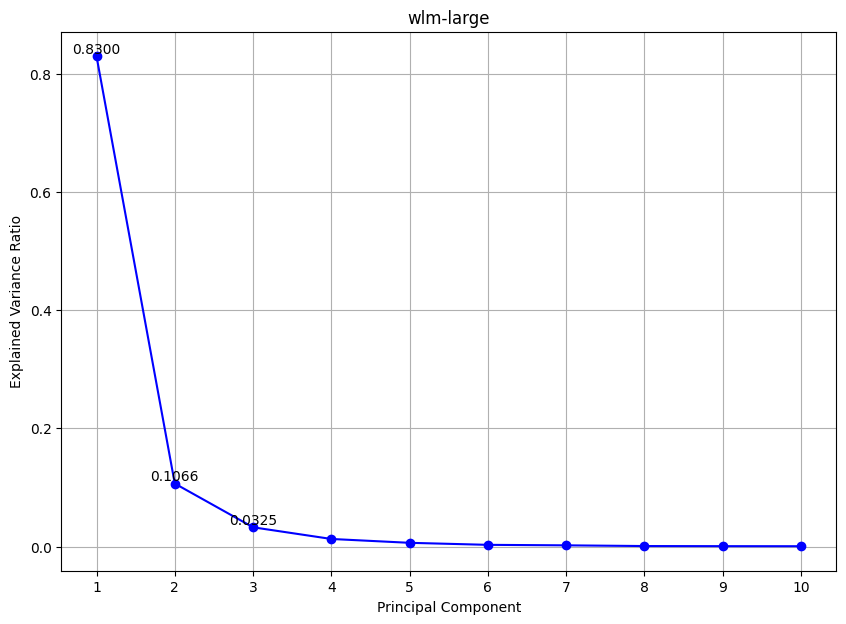

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=1024)
pca.fit(X)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), explained_variance_ratio[:10], marker='o', linestyle='-', color='b')

for i in range(3):
    plt.text(i + 1, explained_variance_ratio[i], f'{explained_variance_ratio[i]:.4f}', ha='center', va='bottom')

plt.title('wlm-large')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

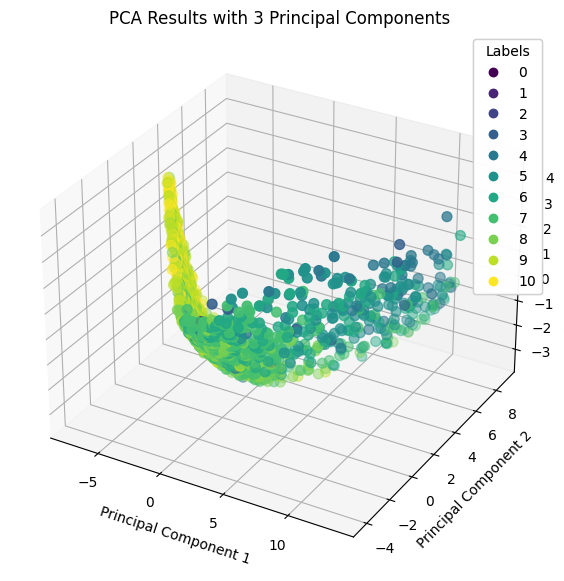

In [ ]:
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = decomposition.PCA(n_components=3)
pca_result = pca.fit_transform(X)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['label'] = Y

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['label'], cmap='viridis', s=50)

legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)

ax.set_title('PCA Results with 3 Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

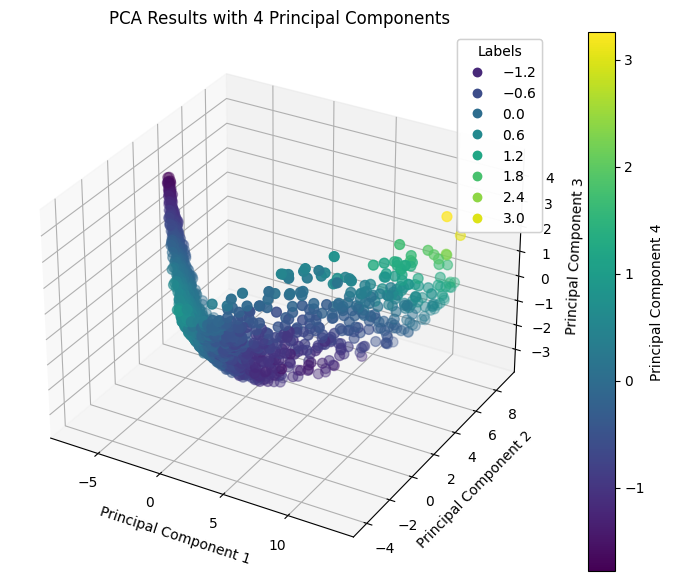

In [ ]:
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

pca = decomposition.PCA(n_components=4)
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['label'] = Y
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['PC4'], cmap='viridis', s=50)
colorbar = plt.colorbar(scatter, ax=ax)
colorbar.set_label('Principal Component 4')
legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)
ax.set_title('PCA Results with 4 Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


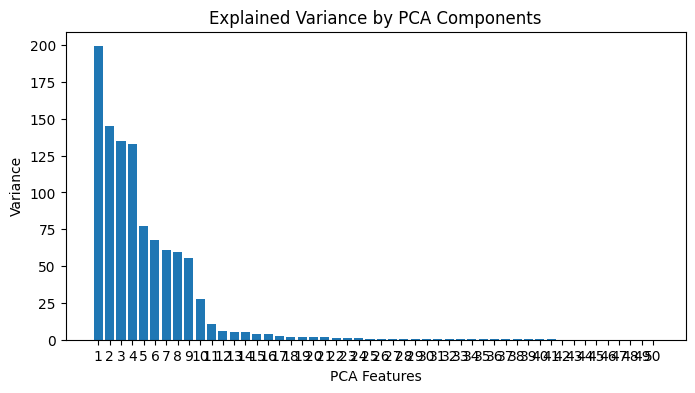

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x_std)

explained_variances = pca.explained_variance_[:50]
components = range(1, len(explained_variances) + 1)

plt.figure(figsize=(8, 4))
plt.bar(components, explained_variances)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.xticks(components)
plt.title('Explained Variance by PCA Components')
plt.show()


In [ ]:
len(pca.explained_variance_)

1024